### Exercise 2b)

In [1]:
from utils.neural_network import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from utils.training import GradientDescent, StochasticGradientDescent
from utils.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep

In [2]:
from utils.cost_functions import SoftmaxCrossEntropy,MSE
from utils.activation_functions import Sigmoid, Identity
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(124)

for i in range(20):
    print(f"{np.random.randn(1).item():.30f}") 

0.288479060931184305704988446450
-0.462954082226586960402414661075
-1.338004420633611024626929975057
2.317015672344601817655984632438
-1.467375933981211799661537042994
-0.748547692135884012998303660424
-1.017521362962644504435161252331
1.635066801024989358026573427196
0.922545612368594225571882816439
-0.719881324562294033775344814785
-0.964883392289054397927827722015
0.253582785747487160499247238477
0.308007396677779043958622651189
-0.071605996398030308247584230230
-1.135480507436871677739986807865
-0.102245395252834117560958304693
0.808186230960141971380039649375
0.231992388214720929306977836859
-1.400358475310590433693391787529
0.715907783687432575092657316418


In [3]:
def runge(x): 
    return 1/(1 + 25*x**2)

np.random.seed(124)

n = 500
x = np.random.uniform(-1, 1, n)
y = runge(x) + 0.05*np.random.normal(0, 1, n)
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 44)

n_folds = 5

kfold = KFold(n_splits=n_folds,shuffle=True,random_state=44)

Testing MSE for OLS linear regression:  0.0033842036002902426


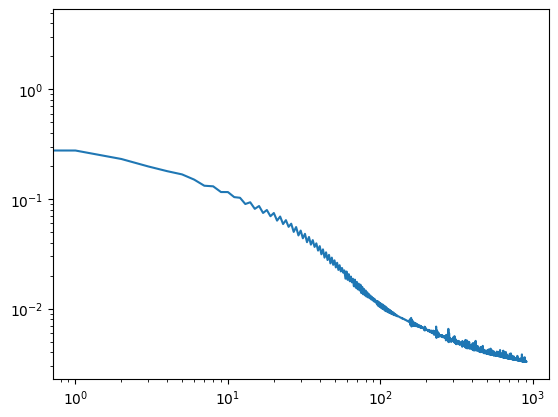

Testing MSE for neural network before training:  13.171450200389852
Testing MSE for neural network after training:  0.0035822172760644547


In [4]:
model = LinearRegression(fit_intercept=True)

model = make_pipeline(PolynomialFeatures(degree=12, include_bias=True), StandardScaler(), model)

estimated_mse_folds = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=kfold)
mse_OLS = np.mean(-estimated_mse_folds)

print("Testing MSE for OLS linear regression: ",mse_OLS)

network_input_size = 1
network_output_size = 1

layer_output_sizes = [50, 50, network_output_size]
activation_funcs = [Sigmoid(), Sigmoid(), Identity()]

no_train_mse = np.zeros(n_folds)
train_mse = np.zeros(n_folds)

for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
    net = NeuralNetwork(network_input_size,
        layer_output_sizes,
        activation_funcs,
        MSE(),
    )
    x_train = x[train_idx]
    x_test = x[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    no_train_mse[fold_idx] = net.cost_batch(x_test,y_test)
    net.train(StochasticGradientDescent(step_method=RMSpropStep(learning_rate=0.01, decay_rate=0.9),inputs = x_train, targets = y_train))
    train_mse[fold_idx] = net.cost_batch(x_test,y_test)

net.plot_loss()

print("Testing MSE for neural network before training: ",np.mean(no_train_mse))

print("Testing MSE for neural network after training: ",np.mean(train_mse))


In [5]:
print(x_test)

[[ 0.78590739]
 [-0.79019492]
 [ 0.28858828]
 [-0.15816882]
 [ 0.34468582]
 [-0.86307566]
 [ 0.21605879]
 [-1.41701481]
 [-1.07606519]
 [-1.51954697]
 [-0.42085203]
 [-1.12928948]
 [ 0.46062328]
 [ 0.73046945]
 [ 0.86826912]
 [ 0.56264664]
 [-1.30428044]
 [-0.91291727]
 [ 1.10012426]
 [-1.25794635]
 [ 0.66183685]
 [ 0.1375762 ]
 [ 1.51582923]
 [-1.40696418]
 [-0.20259277]
 [ 0.4983554 ]
 [ 0.89341075]
 [-0.53785435]
 [ 1.32869765]
 [ 0.91298276]
 [ 0.79911697]
 [-1.09196429]
 [-1.72241196]
 [-0.57763583]
 [ 0.48539972]
 [ 1.27535059]
 [ 0.1774787 ]
 [ 0.70510537]
 [ 0.11098344]
 [ 0.24079127]
 [-0.31465731]
 [ 0.14451934]
 [-1.03739652]
 [-1.59530905]
 [ 1.35762845]
 [-0.04756982]
 [-1.5959659 ]
 [-0.15272338]
 [-1.17406066]
 [ 0.82412866]
 [ 1.50069356]
 [-0.76272066]
 [-1.04861998]
 [ 0.61126948]
 [ 0.72675581]
 [-1.53127822]
 [-1.32136314]
 [ 0.88284158]
 [ 1.58980613]
 [-1.74679803]
 [ 0.74982316]
 [-0.91517324]
 [-1.47697892]
 [-1.38604655]
 [-0.96981307]
 [-1.28048313]
 [ 1.45917

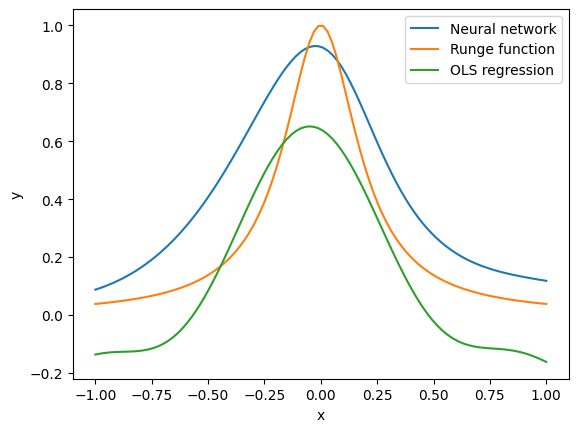

In [6]:
x_test = np.linspace(-1,1, 100)
y_pred = net.predict(x_test.reshape(-1, 1))

model = LinearRegression(fit_intercept=False)

model = make_pipeline(PolynomialFeatures(degree=12, include_bias=False), StandardScaler(), model)

plt.plot(x_test,y_pred,label="Neural network")
plt.plot(x_test,runge(x_test),label="Runge function")
plt.plot(x_test,model.fit(x_train.reshape(-1,1), y_train).predict(x_test.reshape(-1,1)),label="OLS regression")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

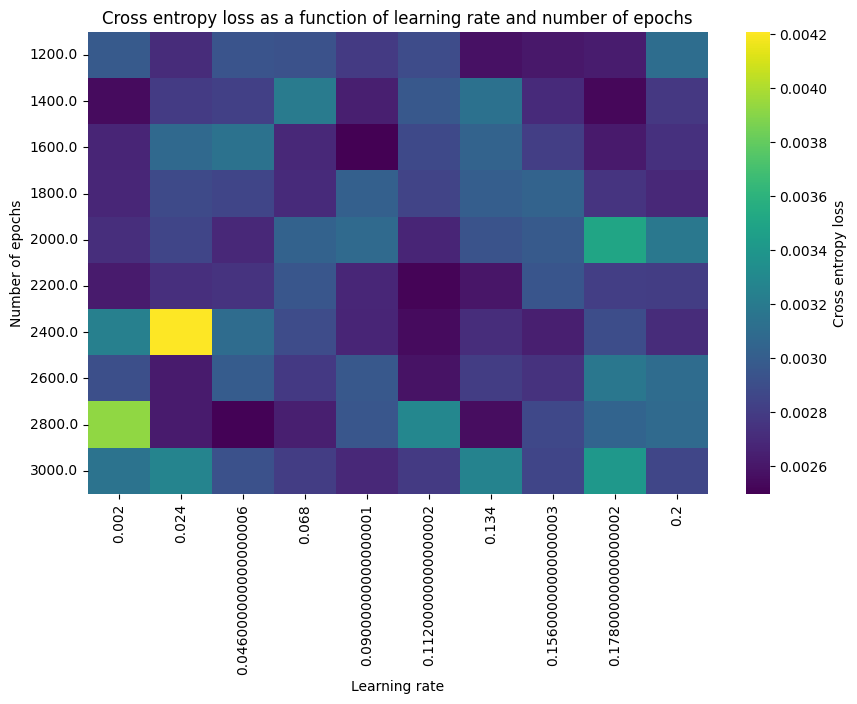

In [ ]:
import seaborn as sns

learning_rates = np.linspace(0.002,0.2,10)
epochs = np.linspace(1200,3000,10)

loss = np.zeros((len(epochs),len(learning_rates)))

for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
            net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                MSE(),
            )
            x_train = x[train_idx]
            x_test = x[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            net.train(StochasticGradientDescent(step_method=RMSpropStep(learning_rate=0.01, decay_rate=0.9),inputs = x_train, targets = y_train),2000)
            loss[j,i] = net.cost_batch(x_test,y_test)

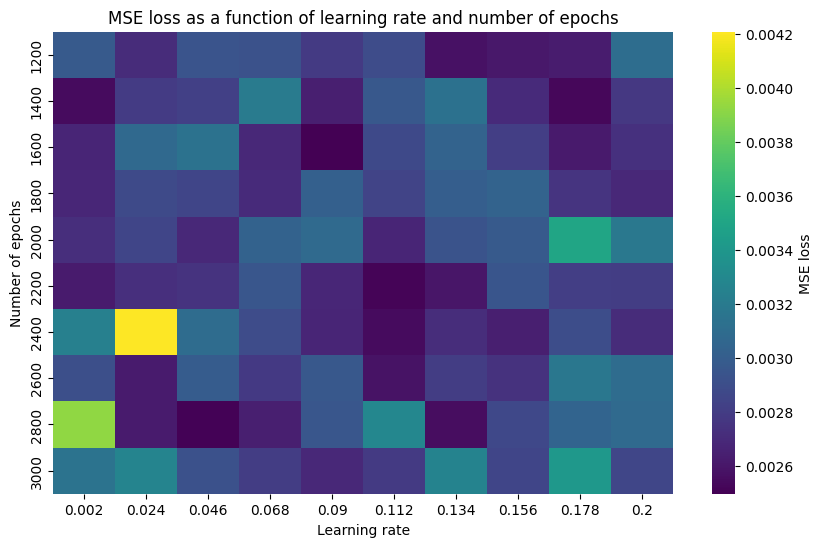

In [ ]:
# display a heatmap, where the color represnts the value of the accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(
    loss,  
    fmt=".2f",   
    cmap="viridis", 
    xticklabels=np.round(learning_rates,3),
    yticklabels=epochs.astype("int"),cbar_kws={"label": "MSE loss"}
)

plt.xlabel("Learning rate")
plt.ylabel("Number of epochs")
plt.title("MSE loss as a function of learning rate and number of epochs")
plt.show()

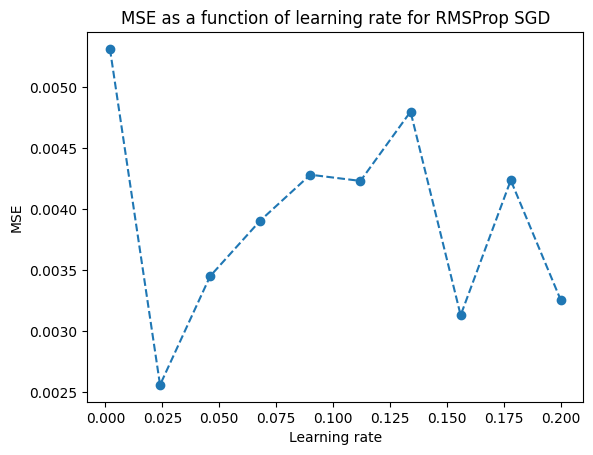

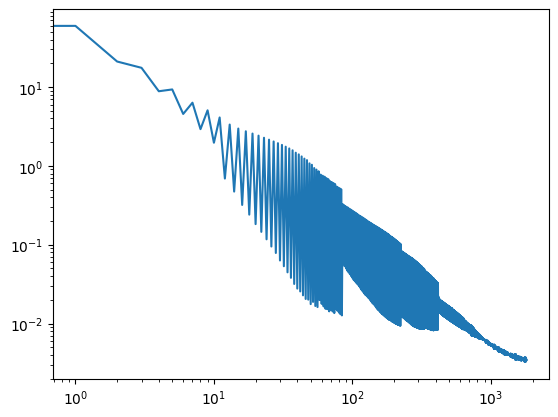

In [ ]:
# Stochastic gradient descent, with RMSProp

learning_rates = np.linspace(0.002,0.2,10)

loss = np.zeros(len(learning_rates))

for i in range(len(learning_rates)):
        for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
            net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                MSE(regularization="L2"),
            )
            x_train = x[train_idx]
            x_test = x[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            net.train(StochasticGradientDescent(step_method=RMSpropStep(learning_rate=learning_rates[i], decay_rate=0.9),inputs = x_train, targets = y_train))
            loss[i] = net.cost_batch(x_test,y_test)

plt.plot(learning_rates,loss,"o",linestyle="--")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("MSE as a function of learning rate for RMSProp SGD")

plt.show()
net.plot_loss()

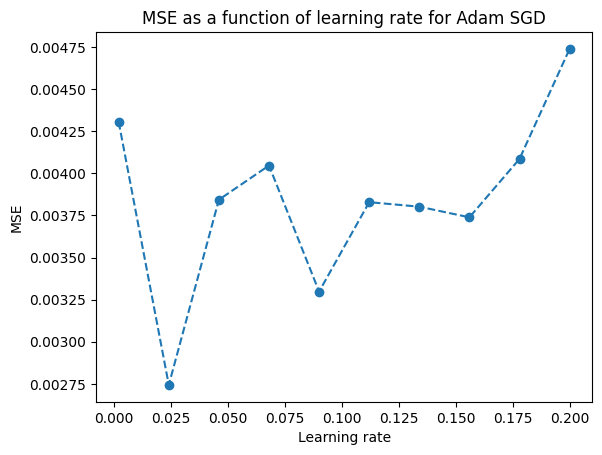

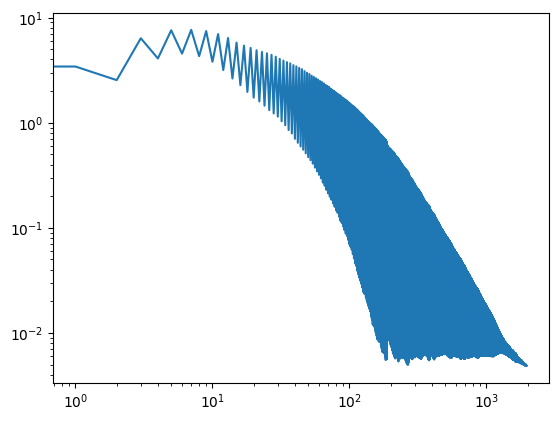

In [8]:
learning_rates = np.linspace(0.002,0.2,10)

loss = np.zeros(len(learning_rates))

for i in range(len(learning_rates)):
        for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
            net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                MSE(),
            )
            x_train = x[train_idx]
            x_test = x[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            net.train(StochasticGradientDescent(step_method=AdamStep(learning_rate=learning_rates[i]),inputs = x_train, targets = y_train))
            loss[i] = net.cost_batch(x_test,y_test)

plt.plot(learning_rates,loss,"o",linestyle="--")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("MSE as a function of learning rate for Adam SGD")
plt.show()

net.plot_loss()

6.068087566886749


c:\GitHub\FYS-STK3155_Project2\.venv\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


5.362599880680808


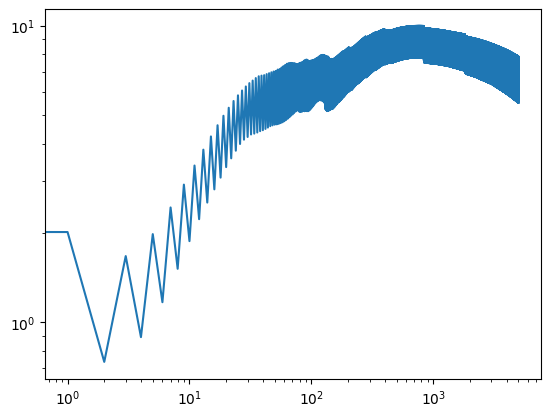

In [ ]:
net = NeuralNetwork(network_input_size,
    layer_output_sizes,
    activation_funcs,
    MSE(),
)
x_train = x[train_idx]
x_test = x[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(net.cost_batch(x_test,y_test))
net.train(GradientDescent(step_method=AdamStep(learning_rate=0.04),inputs = x_train, targets = y_train))
print(net.cost_batch(x_test,y_test))
net.plot_loss()

# Overflow error at: learning rate of 0.04

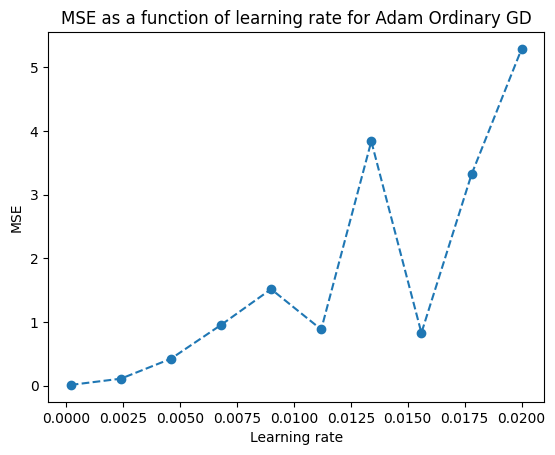

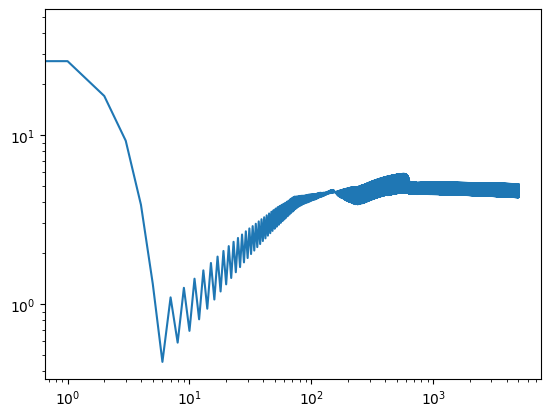

In [18]:
learning_rates = np.linspace(0.0002,0.02,10)

loss = np.zeros(len(learning_rates))

for i in range(len(learning_rates)):
        for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
            net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                MSE(),
            )
            x_train = x[train_idx]
            x_test = x[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            net.train(GradientDescent(step_method=AdamStep(learning_rate=learning_rates[i]),inputs = x_train, targets = y_train))
            loss[i] = net.cost_batch(x_test,y_test)

plt.plot(learning_rates,loss,"o",linestyle="--")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("MSE as a function of learning rate for Adam Ordinary GD")
plt.show()

net.plot_loss()

In [ ]:
learning_rates = np.linspace(0.0002,0.02,10)

loss = np.zeros(len(learning_rates))

for i in range(len(learning_rates)):
        for fold_idx,(train_idx, test_idx) in enumerate(kfold.split(x)): 
            net = NeuralNetwork(network_input_size,
                layer_output_sizes,
                activation_funcs,
                MSE(),
            )
            x_train = x[train_idx]
            x_test = x[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            x_test = scaler.transform(x_test)
            net.train(GradientDescent(step_method=RMSpropStep(learning_rate=learning_rates[i]),inputs = x_train, targets = y_train))
            loss[i] = net.cost_batch(x_test,y_test)

plt.plot(learning_rates,loss,"o",linestyle="--")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("MSE as a function of learning rate for RMSProp Ordinary GD")
plt.show()

net.plot_loss()